Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, mean_squared_error

##Data Collection and Analysis

In [ ]:
df_main = pd.read_csv('/content/parkinsons.csv')

In [ ]:
df_main.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df_main.shape #Gives no. of row and columns in the dataset

(195, 24)

In [ ]:
df_main.info() #non-null values means no value is missing in the 195 rows of a column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df_main.isnull().sum() #checking if the dataset have any missing values

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
# Statistical measures of the data
df_main.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
#Distribution of target column
df_main['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

1 ---> Parkinson's Disease


0 ---> Healthy

In [ ]:
# Grouping the data based on target column
df_main.groupby('status').mean()

<ipython-input-9-45aa8b5f053c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_main.groupby('status').mean()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


We took the mean values of all the features in the dataset and grouped them according to the target variables i.e. 0 and 1

##Trying Onehotencoding on the dataset




 It is used to represent categorical variables as numerical values in a machine learning model.


In [ ]:
df_one = pd.read_csv('/content/with noise_parkinsons - Copy.csv')

In [ ]:
df_one.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,noise
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,589.708594
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,617.313317
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,488.498280
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,287.236718
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,82.320337


In [ ]:
one_hot_encoded_data = pd.get_dummies(df_one, columns = ['name'])
one_hot_encoded_data.head(194)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,name_phon_R01_S49_3,name_phon_R01_S49_4,name_phon_R01_S49_5,name_phon_R01_S49_6,name_phon_R01_S50_1,name_phon_R01_S50_2,name_phon_R01_S50_3,name_phon_R01_S50_4,name_phon_R01_S50_5,name_phon_R01_S50_6
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0,0,0,0,0,0,0,0,0,0
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0,0,0,0,0,0,0,0,0,0
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0,0,0,0,0,0,0,0,0,0
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0,0,0,0,0,0,0,0,0,0
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,201.774,262.707,78.228,0.00694,0.00003,0.00412,0.00396,0.01235,0.02574,0.255,...,0,0,0,0,1,0,0,0,0,0
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0,0,0,0,0,1,0,0,0,0
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0,0,0,0,0,0,1,0,0,0
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0,0,0,0,0,0,0,1,0,0


Trying Noise Reduction on the dataset

In [ ]:
df_noise = pd.read_csv('/content/with noise_parkinsons - Copy.csv')

In [ ]:
df_noise.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,noise
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,589.708594
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,617.313317
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,488.498280
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,287.236718
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,82.320337


This deletes all the duplicates in the data

In [ ]:
df_noise = df_noise.drop_duplicates()

df_noise

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,noise
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,589.708594
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,617.313317
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,488.498280
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,287.236718
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,82.320337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,970.416828
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,651.158590
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,527.264972
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,608.640757


This drops all the missing values in the data

In [ ]:
df_noise = df_noise.dropna()
df_noise

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,noise
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,589.708594
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,617.313317
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,488.498280
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,287.236718
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,82.320337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,970.416828
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,651.158590
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,527.264972
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,608.640757


Standardizing The Data

In [ ]:
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame(one_hot_encoded_data)
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_standardized

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,name_phon_R01_S49_3,name_phon_R01_S49_4,name_phon_R01_S49_5,name_phon_R01_S49_6,name_phon_R01_S50_1,name_phon_R01_S50_2,name_phon_R01_S50_3,name_phon_R01_S50_4,name_phon_R01_S50_5,name_phon_R01_S50_6
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.483467,0.371185,-0.508265,-0.337173,-0.401899,-0.228505,-0.311189,-0.227459,0.593395,0.631498,...,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,13.928388,-0.071796,-0.071796,-0.071796,-0.071796
191,1.339202,0.612690,-0.618218,-0.120037,-0.401899,0.001213,-0.191272,0.002258,-0.116922,-0.099041,...,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,13.928388,-0.071796,-0.071796,-0.071796
192,0.495578,0.470104,-0.968393,1.526058,1.037674,0.991026,0.797139,0.992069,-0.352453,-0.135053,...,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,13.928388,-0.071796,-0.071796
193,1.078761,2.190044,-0.954180,0.243924,-0.113985,0.132963,0.164847,0.131755,-0.358834,-0.212223,...,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,13.928388,-0.071796


##Linear Regression without Hyperparameter

Mean Squared Error: 0.140579355932532
Accuracy: 0.8461538461538461


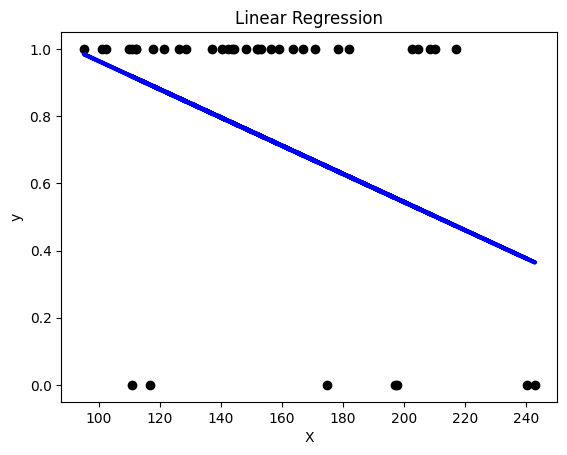

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('/content/parkinsons.csv')

X = data[['MDVP:Fo(Hz)']]
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Convert predicted values to binary (0 or 1)
y_pred_binary = [1 if val >= 0.5 else 0 for val in y_pred]

mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred_binary)

print(f'Mean Squared Error: {mse}')
print(f'Accuracy: {accuracy}')

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


##Linear Regression With Hyperparameter

Best Hyperparameters: {'alpha': 1000}
Mean Squared Error (Ridge): 0.14052942042057753
Accuracy (Ridge): 0.8461538461538461


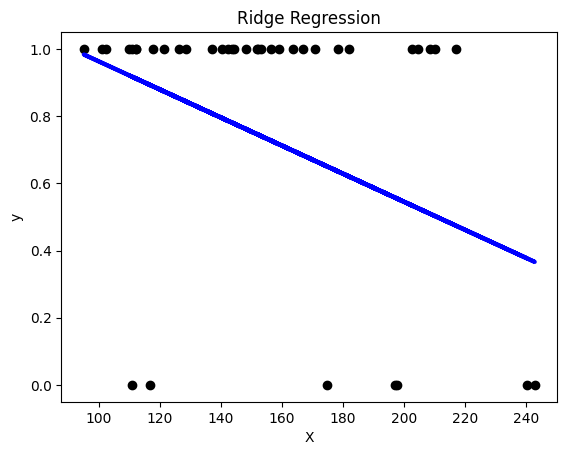

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('/content/parkinsons.csv')

X = data[['MDVP:Fo(Hz)']]
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

best_model = grid_search.best_estimator_

y_pred_ridge = best_model.predict(X_test)

# Convert predicted values to binary (0 or 1)
y_pred_ridge_binary = [1 if val >= 0.5 else 0 for val in y_pred_ridge]

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge_binary)

print(f'Mean Squared Error (Ridge): {mse_ridge}')
print(f'Accuracy (Ridge): {accuracy_ridge}')

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred_ridge, color='blue', linewidth=3)
plt.title('Ridge Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


##Logistic Regression without hyperparameter

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd

data = pd.read_csv('/content/parkinsons.csv')

X = data.drop(columns=['name', 'status'], axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Mean Squared Error: {mse}')


Accuracy: 0.8974358974358975
Mean Squared Error: 0.10256410256410256


##Logistic Regression with hyperparameter

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

data = pd.read_csv('/content/parkinsons.csv')

X = data.drop(columns=['name', 'status'], axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(penalty='l1', solver='liblinear')

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Mean Squared Error: {mse}')


Best Hyperparameters: {'C': 10}
Accuracy: 0.9230769230769231
Mean Squared Error: 0.07692307692307693


##Lasso Regression without hyperparameter

Mean Squared Error: 0.1118176815117204
Accuracy: 0.8717948717948718
             Feature  Coefficient
0        MDVP:Fo(Hz)    -0.058409
1       MDVP:Fhi(Hz)    -0.042709
2       MDVP:Flo(Hz)    -0.057327
3     MDVP:Jitter(%)    -0.023903
4   MDVP:Jitter(Abs)    -0.000000
5           MDVP:RAP    -0.000000
6           MDVP:PPQ    -0.000000
7         Jitter:DDP    -0.000000
8       MDVP:Shimmer     0.000000
9   MDVP:Shimmer(dB)     0.000000
10      Shimmer:APQ3     0.000000
11      Shimmer:APQ5     0.000000
12          MDVP:APQ     0.000000
13       Shimmer:DDA     0.000000
14               NHR    -0.000000
15               HNR    -0.000000
16              RPDE    -0.015488
17               DFA     0.033400
18           spread1     0.142613
19           spread2     0.025688
20                D2     0.094859
21               PPE     0.000000


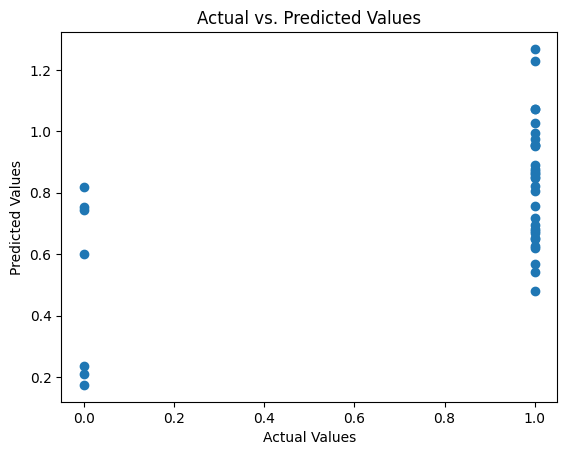

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('/content/parkinsons.csv')

X = data.drop(columns=['name', 'status'], axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alpha = 0.01
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

y_pred = lasso_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Convert predicted values to binary (0 or 1)
y_pred_binary = [1 if val >= 0.5 else 0 for val in y_pred]

accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
print(coefficients)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


#Lasso Regression with hyperparaters

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.382e-03, tolerance: 2.274e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.261e-02, tolerance: 2.520e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.311e-02, tolerance: 2.475e

Best Hyperparameters: {'alpha': 0.001}
Mean Squared Error: 0.10607698891776611
Accuracy: 0.9230769230769231
             Feature  Coefficient
0        MDVP:Fo(Hz)    -0.113766
1       MDVP:Fhi(Hz)    -0.022511
2       MDVP:Flo(Hz)    -0.064668
3     MDVP:Jitter(%)    -1.047414
4   MDVP:Jitter(Abs)    -0.091697
5           MDVP:RAP     1.039121
6           MDVP:PPQ    -0.005234
7         Jitter:DDP     0.005396
8       MDVP:Shimmer     0.089002
9   MDVP:Shimmer(dB)     0.113434
10      Shimmer:APQ3     0.000000
11      Shimmer:APQ5    -0.186732
12          MDVP:APQ     0.024245
13       Shimmer:DDA     0.000000
14               NHR    -0.082764
15               HNR    -0.053368
16              RPDE    -0.091985
17               DFA     0.022009
18           spread1     0.139168
19           spread2     0.096197
20                D2     0.044894
21               PPE     0.102131


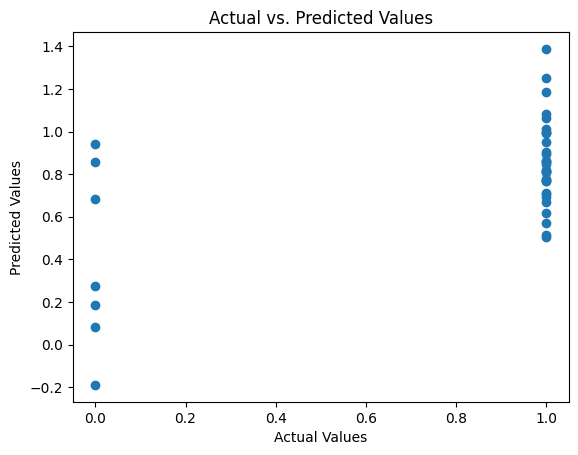

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('/content/parkinsons.csv')

X = data.drop(columns=['name', 'status'], axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_model = Lasso()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

print(f'Best Hyperparameters: {best_params}')

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Convert predicted values to binary (0 or 1)
y_pred_binary = [1 if val >= 0.5 else 0 for val in y_pred]

accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': best_model.coef_})
print(coefficients)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


##Ridge Regression without Hyperparameters

Mean Squared Error (Ridge): 0.11797164876823849
Accuracy (Ridge): 0.8717948717948718
             Feature  Coefficient
0        MDVP:Fo(Hz)    -0.119191
1       MDVP:Fhi(Hz)    -0.021311
2       MDVP:Flo(Hz)    -0.067647
3     MDVP:Jitter(%)    -1.441772
4   MDVP:Jitter(Abs)    -0.125170
5           MDVP:RAP     0.665050
6           MDVP:PPQ     0.123960
7         Jitter:DDP     0.671594
8       MDVP:Shimmer     0.765245
9   MDVP:Shimmer(dB)     0.058944
10      Shimmer:APQ3    -0.087786
11      Shimmer:APQ5    -0.473525
12          MDVP:APQ    -0.056108
13       Shimmer:DDA    -0.183033
14               NHR    -0.102608
15               HNR    -0.070198
16              RPDE    -0.106402
17               DFA     0.027035
18           spread1     0.095401
19           spread2     0.111474
20                D2     0.035648
21               PPE     0.160426


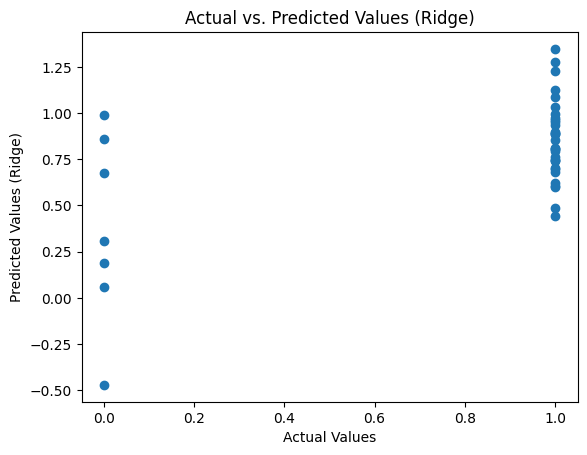

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('/content/parkinsons.csv')

X = data.drop(columns=['name', 'status'], axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alpha_ridge = 0.01
ridge_model = Ridge(alpha=alpha_ridge)
ridge_model.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_model.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error (Ridge): {mse_ridge}')

# Convert predicted values to binary (0 or 1)
y_pred_ridge_binary = [1 if val >= 0.5 else 0 for val in y_pred_ridge]

accuracy_ridge = accuracy_score(y_test, y_pred_ridge_binary)
print(f'Accuracy (Ridge): {accuracy_ridge}')

coefficients_ridge = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_model.coef_})
print(coefficients_ridge)

plt.scatter(y_test, y_pred_ridge)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Ridge)')
plt.title('Actual vs. Predicted Values (Ridge)')
plt.show()


##Ridge Regression with Hyperparamater

Best Hyperparameters: {'alpha': 0.1}
Mean Squared Error (Ridge): 0.1099029040982521
Accuracy (Ridge): 0.8717948717948718
             Feature  Coefficient
0        MDVP:Fo(Hz)    -0.123309
1       MDVP:Fhi(Hz)    -0.021637
2       MDVP:Flo(Hz)    -0.064749
3     MDVP:Jitter(%)    -1.182487
4   MDVP:Jitter(Abs)    -0.140278
5           MDVP:RAP     0.607226
6           MDVP:PPQ    -0.001612
7         Jitter:DDP     0.605365
8       MDVP:Shimmer     0.453921
9   MDVP:Shimmer(dB)     0.114651
10      Shimmer:APQ3    -0.074294
11      Shimmer:APQ5    -0.338799
12          MDVP:APQ    -0.034380
13       Shimmer:DDA    -0.084002
14               NHR    -0.102978
15               HNR    -0.064417
16              RPDE    -0.102891
17               DFA     0.024007
18           spread1     0.101661
19           spread2     0.105134
20                D2     0.036155
21               PPE     0.158613


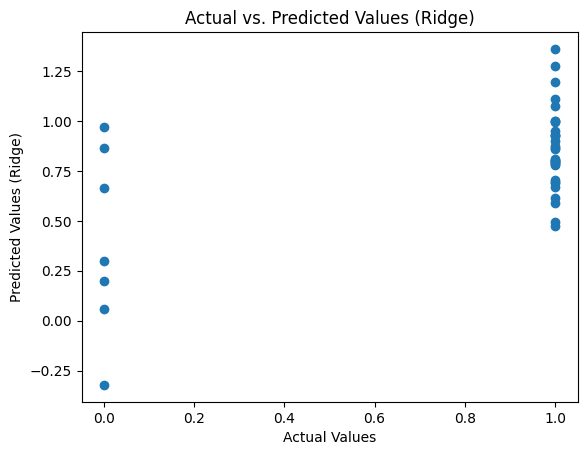

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('/content/parkinsons.csv')

X = data.drop(columns=['name', 'status'], axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

print(f'Best Hyperparameters: {best_params}')

best_model = grid_search.best_estimator_
y_pred_ridge = best_model.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error (Ridge): {mse_ridge}')

# Convert predicted values to binary (0 or 1)
y_pred_ridge_binary = [1 if val >= 0.5 else 0 for val in y_pred_ridge]

accuracy_ridge = accuracy_score(y_test, y_pred_ridge_binary)
print(f'Accuracy (Ridge): {accuracy_ridge}')

coefficients_ridge = pd.DataFrame({'Feature': X.columns, 'Coefficient': best_model.coef_})
print(coefficients_ridge)

plt.scatter(y_test, y_pred_ridge)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Ridge)')
plt.title('Actual vs. Predicted Values (Ridge)')
plt.show()


# Classifiers Section

##K-means with KNN with Hyperparamters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


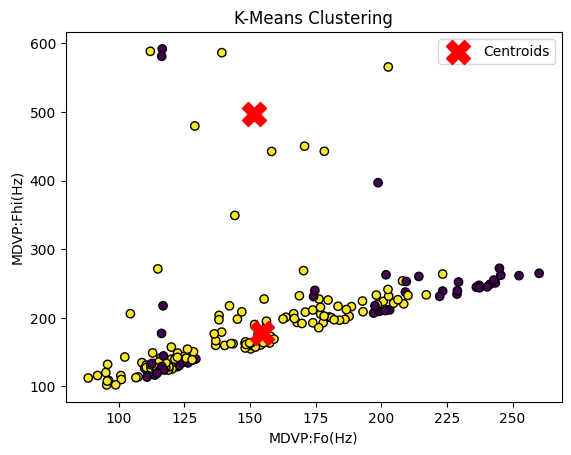

Best Hyperparameters: {'n_neighbors': 5}
Accuracy: 82.05%


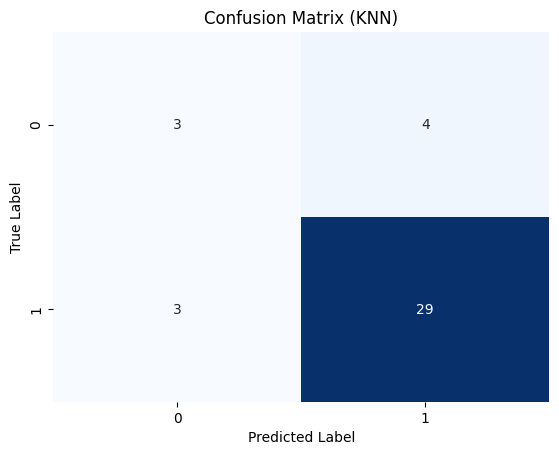

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap

dataset = pd.read_csv('/content/with noise_parkinsons - Copy.csv')

features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']

y = dataset['status']

X_kmeans = dataset[features]
kmeans = KMeans(n_clusters=2, random_state=42)
dataset['cluster'] = kmeans.fit_predict(X_kmeans)

plt.scatter(X_kmeans.iloc[:, 0], X_kmeans.iloc[:, 1], c=dataset['status'], cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('MDVP:Fhi(Hz)')
plt.legend()
plt.show()

X_knn = dataset[features]
X_train, X_test, y_train, y_test = train_test_split(X_knn, y, test_size=0.2, random_state=42)

# Standardize features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

y_pred = grid_search.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (KNN)')
plt.show()

def plot_decision_boundary(X, y, model, h=0.02):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary (KNN)")
    plt.show()


In [ ]:
!pip install fuzzy-c-means

  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully uninstalled typer-0.9.0
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


##Fuzzy C-means with KNN with Hyperparameter

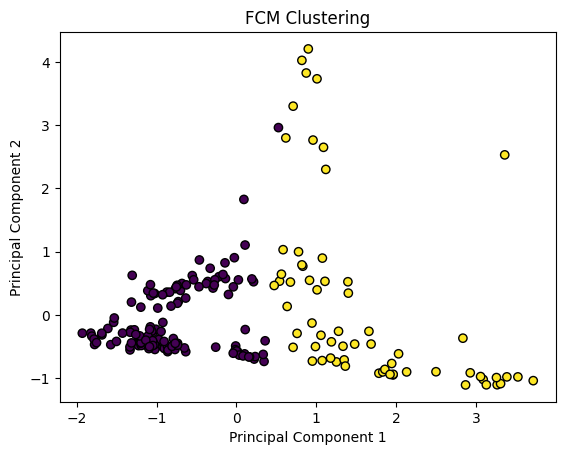

Best Hyperparameters: {'n_neighbors': 5}
Accuracy: 71.79%


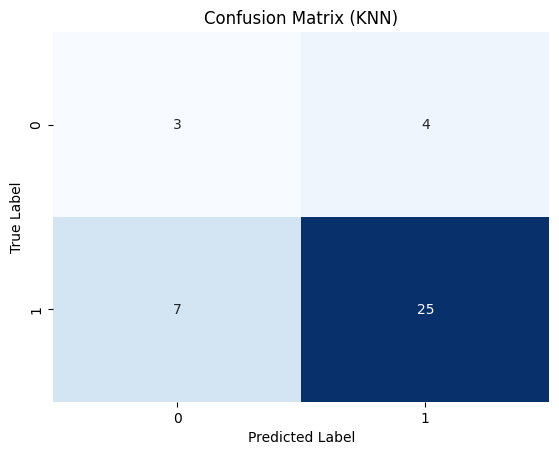

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from fcmeans import FCM

dataset = pd.read_csv('/content/with noise_parkinsons - Copy.csv')

features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']

y = dataset['status']

X_fcm = dataset[features]

scaler = StandardScaler()
X_fcm_scaled = scaler.fit_transform(X_fcm)
pca = PCA(n_components=2)
X_fcm_pca = pca.fit_transform(X_fcm_scaled)

fcm = FCM(n_clusters=2)
fcm.fit(X_fcm_scaled)

y_pred_fcm = fcm.predict(X_fcm_scaled)

plt.scatter(X_fcm_pca[:, 0], X_fcm_pca[:, 1], c=y_pred_fcm.ravel(), cmap='viridis', edgecolor='k')
plt.title('FCM Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_fcm_pca, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

y_pred = grid_search.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (KNN)')
plt.show()

#K-means with SVM with Hyperparamters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


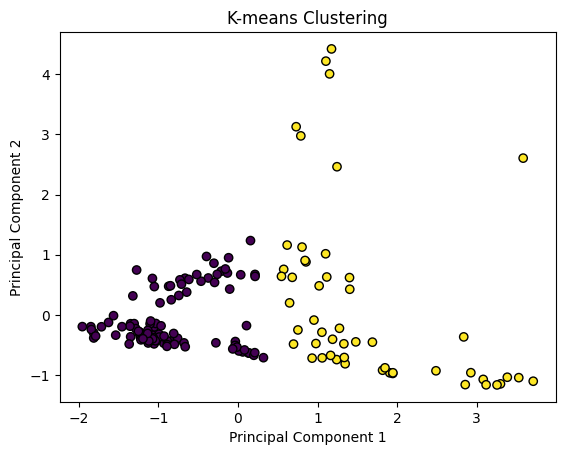

Best SVM Hyperparameters: {'C': 0.1, 'kernel': 'linear'}
SVM Accuracy: 30.77%


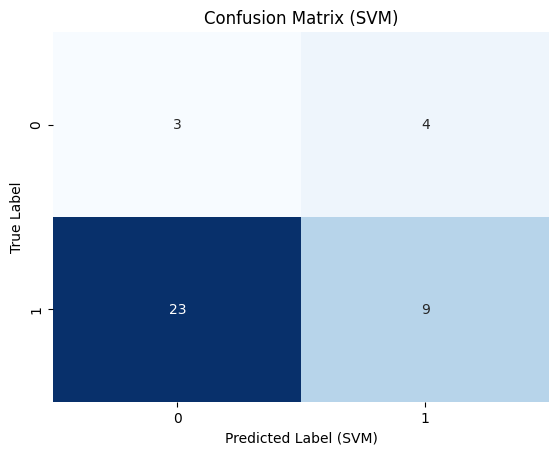

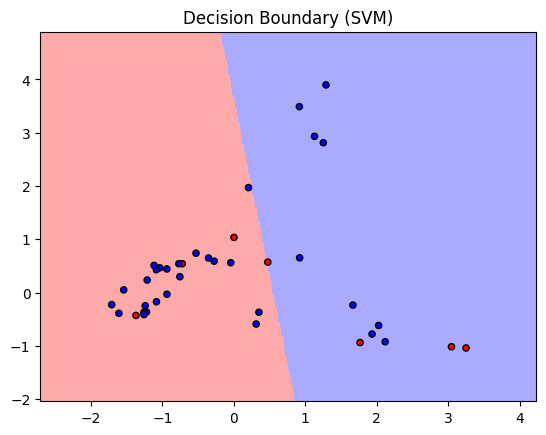

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

dataset = pd.read_csv('/content/with noise_parkinsons - Copy.csv')

features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']

y = dataset['status']

X_train, X_test, y_train, y_test = train_test_split(dataset[features], y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear']}
svm_classifier = SVC()
svm_grid_search = GridSearchCV(svm_classifier, svm_params, cv=5)
svm_grid_search.fit(X_train_pca, kmeans.labels_)

print("Best SVM Hyperparameters:", svm_grid_search.best_params_)

y_pred_svm = svm_grid_search.predict(X_test_pca)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label (SVM)')
plt.ylabel('True Label')
plt.title('Confusion Matrix (SVM)')
plt.show()

def plot_decision_boundary_svm(X, y, model, h=0.02):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary (SVM)")
    plt.show()

plot_decision_boundary_svm(X_test_pca, y_test, svm_grid_search, h=0.02)


##Bayesian Classifier without hyperparameter

Gaussian Naive Bayes Accuracy: 69.23%


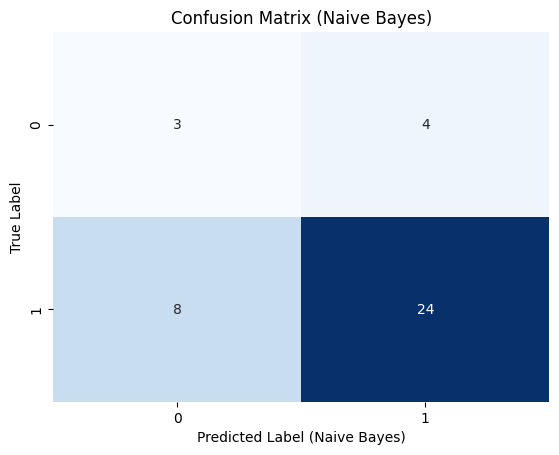

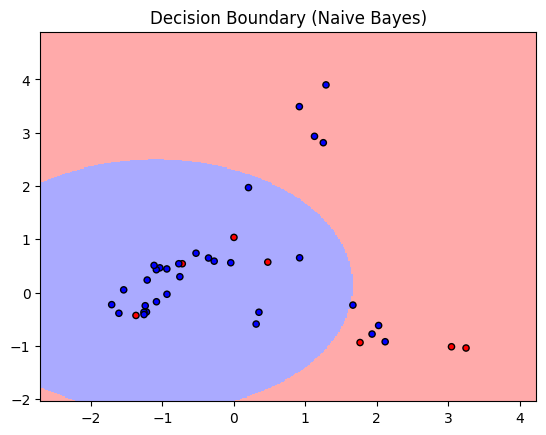

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('/content/with noise_parkinsons - Copy.csv')

features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']

y = dataset['status']

X_train, X_test, y_train, y_test = train_test_split(dataset[features], y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train_pca, y_train)

y_pred_nb = nb_classifier.predict(X_test_pca)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Gaussian Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%')

cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label (Naive Bayes)')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

def plot_decision_boundary_nb(X, y, model, h=0.02):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary (Naive Bayes)")
    plt.show()

plot_decision_boundary_nb(X_test_pca, y_test, nb_classifier, h=0.02)


##Bayesian Classifier with Hyperparameter

Gaussian Naive Bayes Accuracy: 71.79%


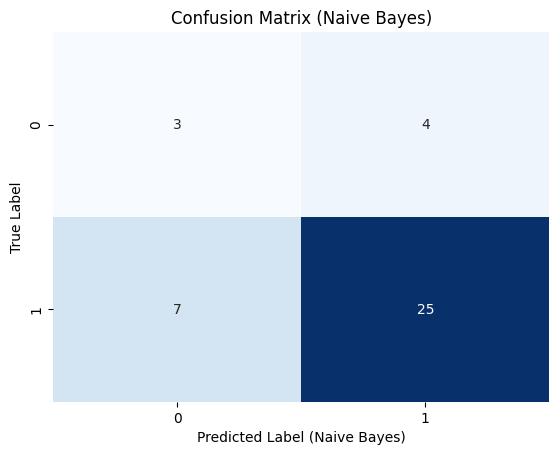

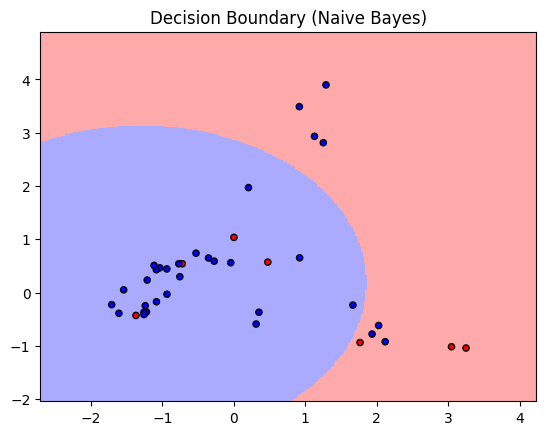

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('/content/with noise_parkinsons - Copy.csv')

features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']

y = dataset['status']

X_train, X_test, y_train, y_test = train_test_split(dataset[features], y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

nb_classifier = GaussianNB()

grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

best_var_smoothing = grid_search.best_params_['var_smoothing']

nb_classifier = GaussianNB(var_smoothing=best_var_smoothing)
nb_classifier.fit(X_train_pca, y_train)

y_pred_nb = nb_classifier.predict(X_test_pca)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Gaussian Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%')

cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label (Naive Bayes)')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

def plot_decision_boundary_nb(X, y, model, h=0.02):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary (Naive Bayes)")
    plt.show()

plot_decision_boundary_nb(X_test_pca, y_test, nb_classifier, h=0.02)


##Naïve Bayes Classifier without Hyperparameter

Gaussian Naive Bayes Accuracy: 69.23%


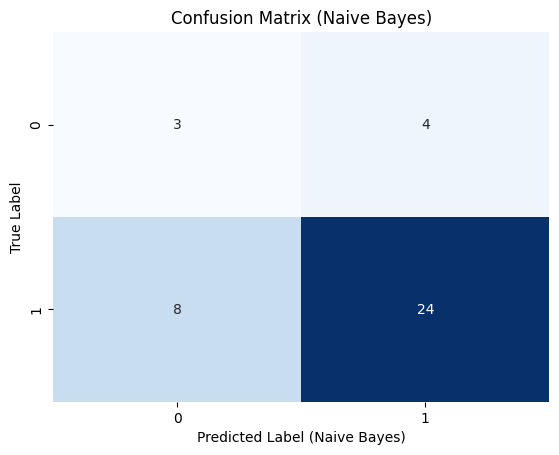

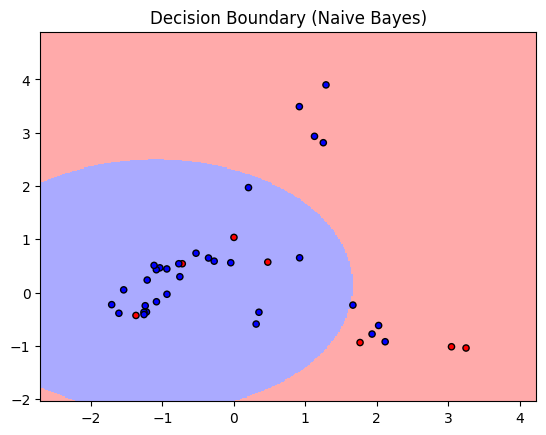

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('/content/with noise_parkinsons - Copy.csv')

features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']

y = dataset['status']

X_train, X_test, y_train, y_test = train_test_split(dataset[features], y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

nb_classifier = GaussianNB()

nb_classifier.fit(X_train_pca, y_train)

y_pred_nb = nb_classifier.predict(X_test_pca)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Gaussian Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%')

cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label (Naive Bayes)')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

def plot_decision_boundary_nb(X, y, model, h=0.02):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary (Naive Bayes)")
    plt.show()

plot_decision_boundary_nb(X_test_pca, y_test, nb_classifier, h=0.02)


##Naïve Bayes Classifier with Hyperparameters

Gaussian Naive Bayes Accuracy: 71.79%


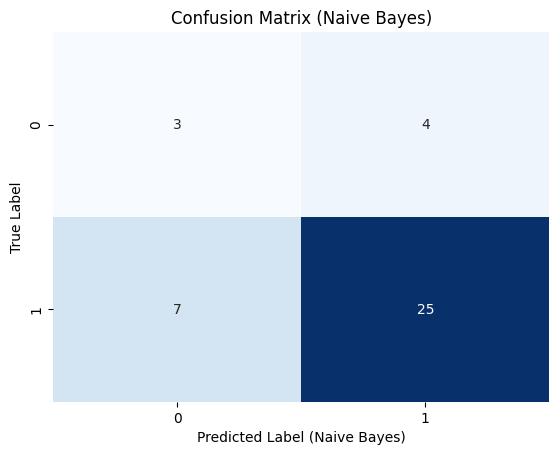

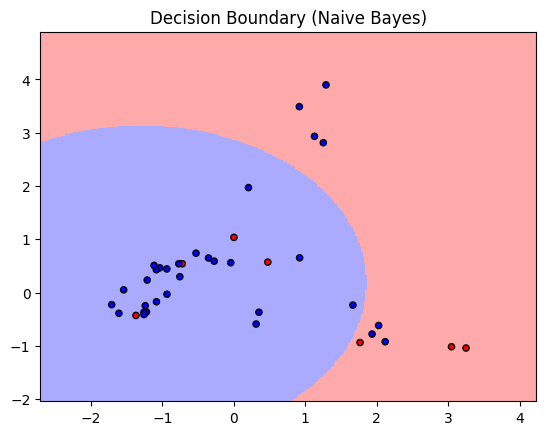

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

y = dataset['status']

X_train, X_test, y_train, y_test = train_test_split(dataset[features], y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

nb_classifier = GaussianNB()

grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

best_var_smoothing = grid_search.best_params_['var_smoothing']

nb_classifier = GaussianNB(var_smoothing=best_var_smoothing)
nb_classifier.fit(X_train_pca, y_train)

y_pred_nb = nb_classifier.predict(X_test_pca)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Gaussian Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%')


cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label (Naive Bayes)')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

def plot_decision_boundary_nb(X, y, model, h=0.02):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary (Naive Bayes)")
    plt.show()

plot_decision_boundary_nb(X_test_pca, y_test, nb_classifier, h=0.02)


##Decision Tree without Hyperparameters

Decision Tree Accuracy: 74.36%
Mean Squared Error (Decision Tree): 0.2564102564102564
              precision    recall  f1-score   support

           0       0.33      0.43      0.38         7
           1       0.87      0.81      0.84        32

    accuracy                           0.74        39
   macro avg       0.60      0.62      0.61        39
weighted avg       0.77      0.74      0.76        39



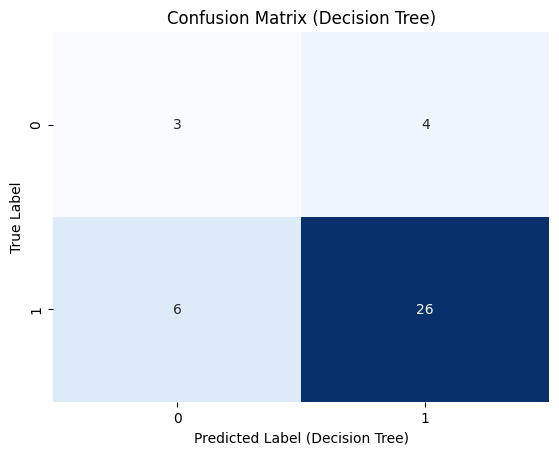

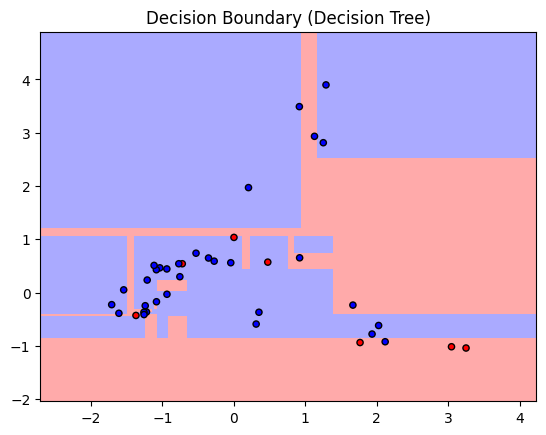

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your dataset
dataset = pd.read_csv('/content/with noise_parkinsons - Copy.csv')

# Features for both clustering and classification
features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']

# Labels for classification
y = dataset['status']

# Split the data into training and testing sets for classification
X_train, X_test, y_train, y_test = train_test_split(dataset[features], y, test_size=0.2, random_state=42)

# Standardize features for Decision Trees
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for visualization and feature reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test_pca)

# Evaluate Decision Tree performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt * 100:.2f}%')

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Mean Squared Error (Decision Tree): {mse_dt}')

# Print precision, recall, and F1-score
print(classification_report(y_test, y_pred_dt))

# Plot confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label (Decision Tree)')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()

# Visualize decision boundary for Decision Tree
def plot_decision_boundary_dt(X, y, model, h=0.02):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary (Decision Tree)")
    plt.show()

# Plot decision boundary for Decision Tree using the first two principal components
plot_decision_boundary_dt(X_test_pca, y_test, dt_classifier, h=0.02)


##Decision Tree with Hyperparameter

Decision Tree Accuracy: 82.05%
Mean Squared Error (Decision Tree): 0.1794871794871795
              precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       0.90      0.88      0.89        32

    accuracy                           0.82        39
   macro avg       0.70      0.72      0.71        39
weighted avg       0.83      0.82      0.83        39



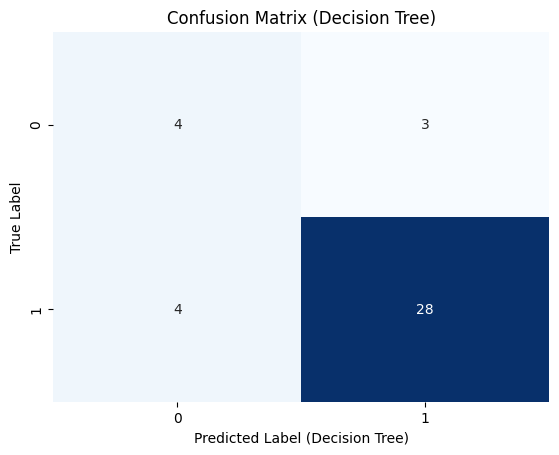

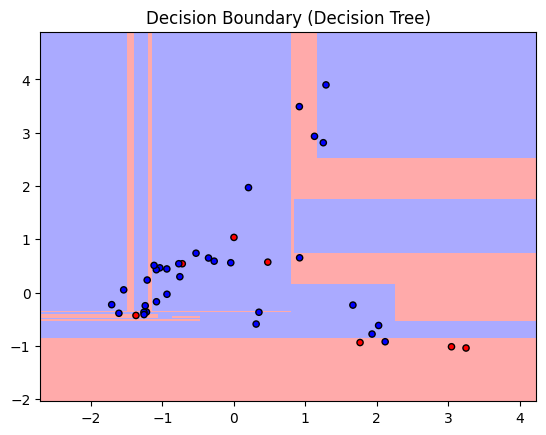

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('/content/with noise_parkinsons - Copy.csv')

features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']

y = dataset['status']

X_train, X_test, y_train, y_test = train_test_split(dataset[features], y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

best_params = grid_search.best_params_

dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
dt_classifier.fit(X_train_pca, y_train)

y_pred_dt = dt_classifier.predict(X_test_pca)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt * 100:.2f}%')

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Mean Squared Error (Decision Tree): {mse_dt}')

print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label (Decision Tree)')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()

def plot_decision_boundary_dt(X, y, model, h=0.02):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary (Decision Tree)")
    plt.show()

plot_decision_boundary_dt(X_test_pca, y_test, dt_classifier, h=0.02)


##Deep Learning

##KMeans with CNN

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


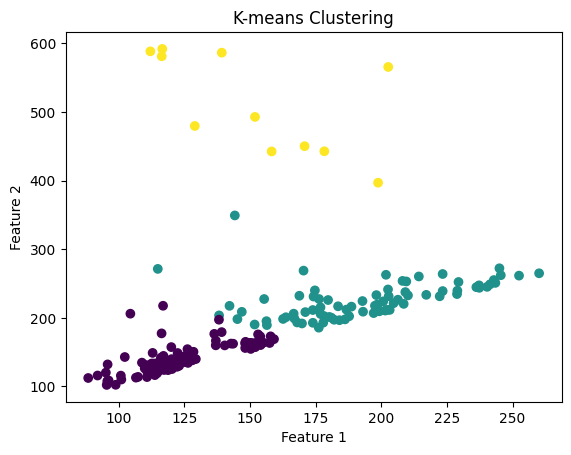

Evaluation for Cluster 0:
Accuracy: 0.9326923076923077
Precision: 0.945054945054945
Recall: 0.9772727272727273
F1 Score: 0.9608938547486033
Confusion Matrix:
[[11  5]
 [ 2 86]]


Evaluation for Cluster 1:
Accuracy: 0.9125
Precision: 0.9583333333333334
Recall: 0.9019607843137255
F1 Score: 0.9292929292929293
Confusion Matrix:
[[27  2]
 [ 5 46]]


Evaluation for Cluster 2:
Accuracy: 0.7272727272727273
Precision: 0.8571428571428571
Recall: 0.75
F1 Score: 0.7999999999999999
Confusion Matrix:
[[2 1]
 [2 6]]




In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('/content/parkinsons.csv')

# Select features for clustering
X = data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)']].values

# Apply K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Visualize K-means clustering
plt.scatter(X[:, 0], X[:, 1], c=data['cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Initialize lists to store evaluation metrics for each cluster
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Apply K-nearest neighbors within each cluster
for cluster_id in range(num_clusters):
    cluster_data = data[data['cluster'] == cluster_id]

    unique_classes = np.unique(cluster_data['status'].values)
    if len(unique_classes) > 1:  # Check if there is more than one class in the cluster
        y = cluster_data['status'].values
        X_cluster = cluster_data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)']].values

        # Create and fit a K-nearest neighbors classifier
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_cluster, y)

        # Use the same test points for all clusters
        test_points = np.array([[54, 8600], [4410, 23005]])

        # Predictions
        predictions = knn.predict(test_points)

        # Evaluate the model
        accuracy = accuracy_score(y, knn.predict(X_cluster))
        precision = precision_score(y, knn.predict(X_cluster))
        recall = recall_score(y, knn.predict(X_cluster))
        f1 = f1_score(y, knn.predict(X_cluster))

        # Append metrics to lists
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        print(f'Evaluation for Cluster {cluster_id}:')
        print(f'Accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1 Score: {f1}')
        print('Confusion Matrix:')
        print(confusion_matrix(y, knn.predict(X_cluster)))
        print('\n')

# Plot the evaluation metrics
metrics_df = pd.DataFrame({
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})


##K-means with CNN with Hyperparameters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


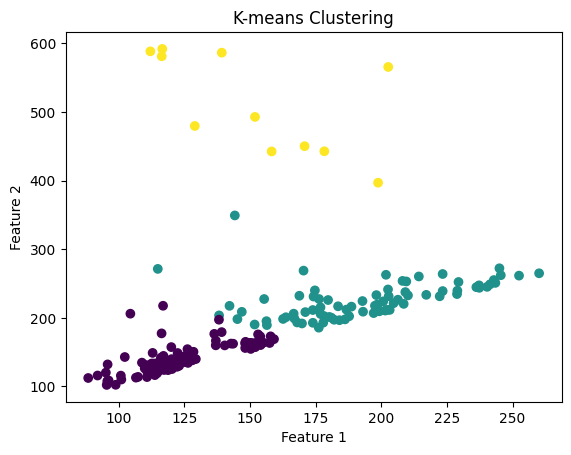

Best Hyperparameters for Cluster 0: {'n_neighbors': 7}
Evaluation for Cluster 0:
Accuracy: 0.8846153846153846
Precision: 0.88
Recall: 1.0
F1 Score: 0.9361702127659575
Confusion Matrix:
[[ 4 12]
 [ 0 88]]


Best Hyperparameters for Cluster 1: {'n_neighbors': 7}
Evaluation for Cluster 1:
Accuracy: 0.9125
Precision: 0.94
Recall: 0.9215686274509803
F1 Score: 0.9306930693069307
Confusion Matrix:
[[26  3]
 [ 4 47]]


Best Hyperparameters for Cluster 2: {'n_neighbors': 3}
Evaluation for Cluster 2:
Accuracy: 0.7272727272727273
Precision: 0.8571428571428571
Recall: 0.75
F1 Score: 0.7999999999999999
Confusion Matrix:
[[2 1]
 [2 6]]




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/us

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/parkinsons.csv')

X = data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)']].values

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=data['cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

best_hyperparameters = []
best_accuracy_scores = []
best_precision_scores = []
best_recall_scores = []
best_f1_scores = []

for cluster_id in range(num_clusters):
    cluster_data = data[data['cluster'] == cluster_id]

    unique_classes = np.unique(cluster_data['status'].values)
    if len(unique_classes) > 1:
        y = cluster_data['status'].values
        X_cluster = cluster_data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)']].values

        param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

        knn = KNeighborsClassifier()

        grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
        grid_search.fit(X_cluster, y)

        best_knn = grid_search.best_estimator_

        test_points = np.array([[54, 8600], [4410, 23005]])

        predictions = best_knn.predict(test_points)

        accuracy = accuracy_score(y, best_knn.predict(X_cluster))
        precision = precision_score(y, best_knn.predict(X_cluster))
        recall = recall_score(y, best_knn.predict(X_cluster))
        f1 = f1_score(y, best_knn.predict(X_cluster))

        best_hyperparameters.append(grid_search.best_params_)
        best_accuracy_scores.append(accuracy)
        best_precision_scores.append(precision)
        best_recall_scores.append(recall)
        best_f1_scores.append(f1)

        print(f'Best Hyperparameters for Cluster {cluster_id}: {grid_search.best_params_}')
        print(f'Evaluation for Cluster {cluster_id}:')
        print(f'Accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1 Score: {f1}')
        print('Confusion Matrix:')
        print(confusion_matrix(y, best_knn.predict(X_cluster)))
        print('\n')

best_metrics_df = pd.DataFrame({
    'Accuracy': best_accuracy_scores,
    'Precision': best_precision_scores,
    'Recall': best_recall_scores,
    'F1 Score': best_f1_scores
})

##AlexNet

AlexNet is a deep learning model and it is a variant of the convolutional neural network

Epoch 1/100
4/4 [==============================] - 2s 124ms/step - loss: 1.1011 - accuracy: 0.2661 - val_loss: 0.6942 - val_accuracy: 0.4375
Epoch 2/100
4/4 [==============================] - 0s 18ms/step - loss: 0.8177 - accuracy: 0.4274 - val_loss: 0.5748 - val_accuracy: 0.6875
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 0.7002 - accuracy: 0.5081 - val_loss: 0.5118 - val_accuracy: 0.7188
Epoch 4/100
4/4 [==============================] - 0s 23ms/step - loss: 0.6009 - accuracy: 0.6532 - val_loss: 0.4720 - val_accuracy: 0.7188
Epoch 5/100
4/4 [==============================] - 0s 27ms/step - loss: 0.5655 - accuracy: 0.6935 - val_loss: 0.4456 - val_accuracy: 0.7500
Epoch 6/100
4/4 [==============================] - 0s 26ms/step - loss: 0.4959 - accuracy: 0.7500 - val_loss: 0.4285 - val_accuracy: 0.7500
Epoch 7/100
4/4 [==============================] - 0s 22ms/step - loss: 0.4752 - accuracy: 0.7661 - val_loss: 0.4164 - val_accuracy: 0.7500
Epoch 8/100
4/4 [==

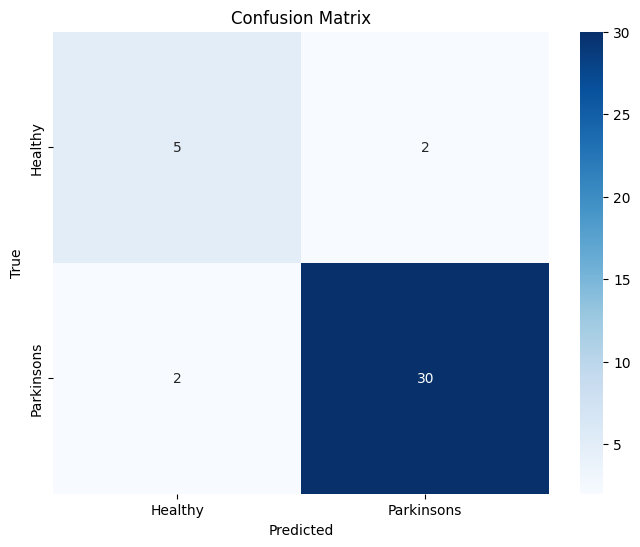

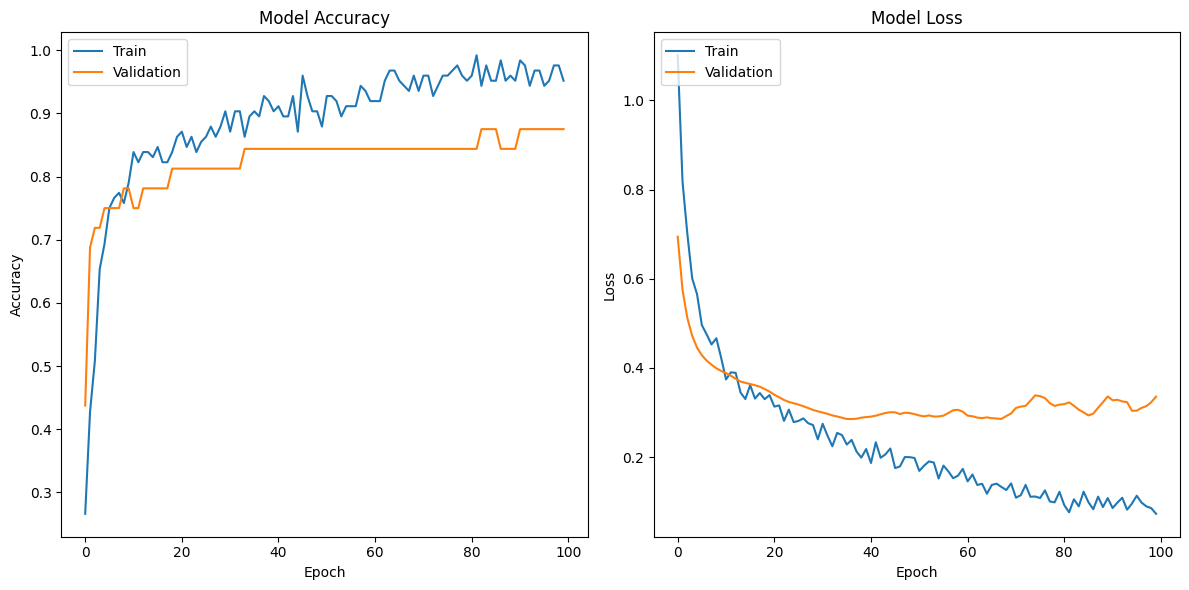

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

# Assuming df_main is the correct DataFrame based on your previous code
data = pd.read_csv('/content/parkinsons.csv')

X_data = df_main.drop(columns=['name', 'status'], axis=1)
y_labels = df_main['status']

label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(y_labels)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a simple feedforward neural network model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(np.unique(y_labels)), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate and print accuracy
test_accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Calculate and print precision, recall, and f1-score
classification_rep = classification_report(y_test, y_pred_classes, target_names=['Healthy', 'Parkinsons'])
print('Classification Report:\n', classification_rep)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


##AlexNet with Hyperparameters

Epoch 1/50
2/2 [==============================] - 1s 214ms/step - loss: 0.7092 - accuracy: 0.5403 - val_loss: 0.5407 - val_accuracy: 0.7500
Epoch 2/50
2/2 [==============================] - 0s 58ms/step - loss: 0.5906 - accuracy: 0.6935 - val_loss: 0.4552 - val_accuracy: 0.7500
Epoch 3/50
2/2 [==============================] - 0s 56ms/step - loss: 0.5232 - accuracy: 0.7742 - val_loss: 0.4149 - val_accuracy: 0.7500
Epoch 4/50
2/2 [==============================] - 0s 37ms/step - loss: 0.4281 - accuracy: 0.7903 - val_loss: 0.3925 - val_accuracy: 0.7500
Epoch 5/50
2/2 [==============================] - 0s 53ms/step - loss: 0.4420 - accuracy: 0.8145 - val_loss: 0.3800 - val_accuracy: 0.7500
Epoch 6/50
2/2 [==============================] - 0s 54ms/step - loss: 0.3896 - accuracy: 0.8145 - val_loss: 0.3709 - val_accuracy: 0.7500
Epoch 7/50
2/2 [==============================] - 0s 39ms/step - loss: 0.3960 - accuracy: 0.8226 - val_loss: 0.3629 - val_accuracy: 0.7500
Epoch 8/50
2/2 [==========

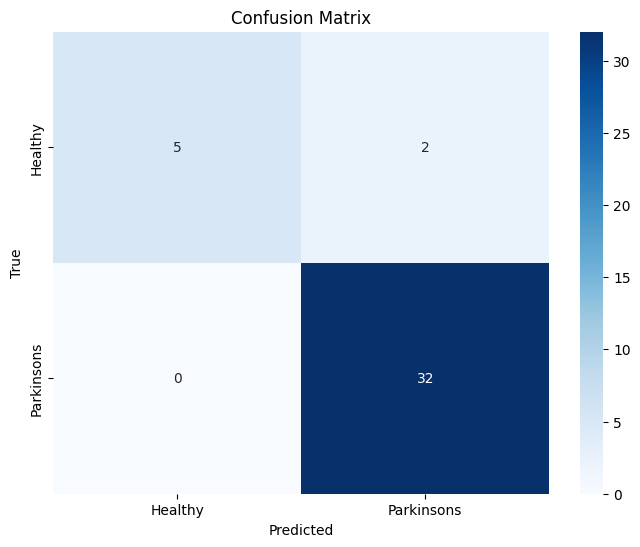

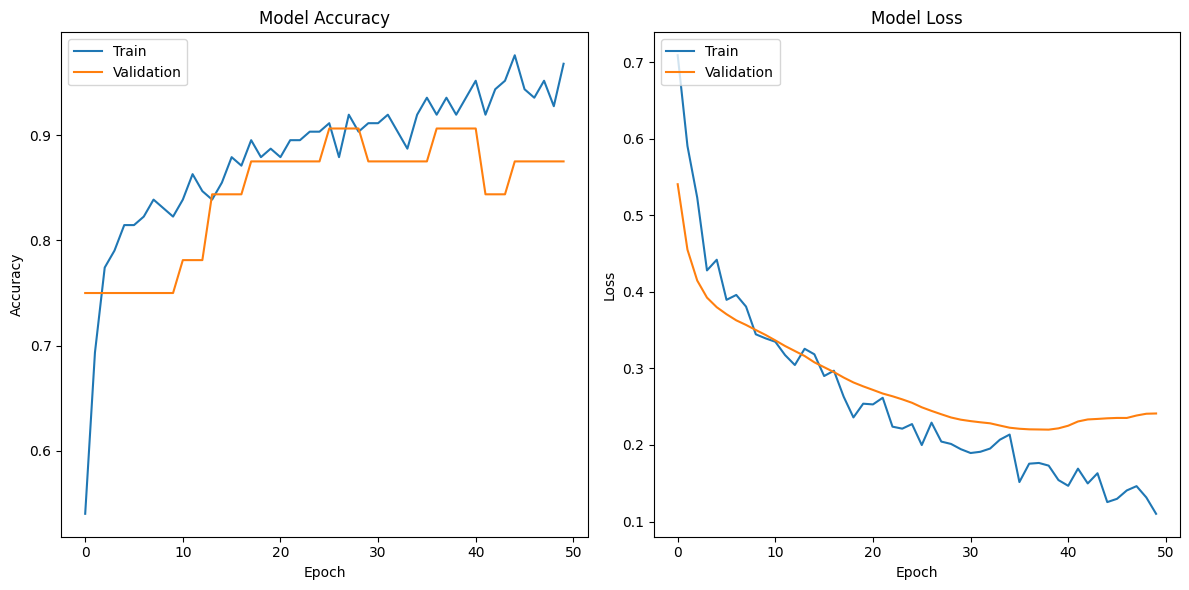

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

data = pd.read_csv('/content/parkinsons.csv')

X_data = df_main.drop(columns=['name', 'status'], axis=1)
y_labels = df_main['status']

label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(y_labels)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(np.unique(y_labels)), activation='softmax')
])

learning_rate = 0.001
batch_size = 64
epochs = 50

model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

test_accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

classification_rep = classification_report(y_test, y_pred_classes, target_names=['Healthy', 'Parkinsons'])
print('Classification Report:\n', classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


##LSTM

Epoch 1/10
5/5 [==============================] - 4s 162ms/step - loss: 0.6278 - accuracy: 0.7083 - val_loss: 0.5622 - val_accuracy: 0.7500
Epoch 2/10
5/5 [==============================] - 0s 26ms/step - loss: 0.5070 - accuracy: 0.8125 - val_loss: 0.5348 - val_accuracy: 0.7500
Epoch 3/10
5/5 [==============================] - 0s 30ms/step - loss: 0.4595 - accuracy: 0.8125 - val_loss: 0.5589 - val_accuracy: 0.7500
Epoch 4/10
5/5 [==============================] - 0s 26ms/step - loss: 0.4583 - accuracy: 0.8125 - val_loss: 0.5357 - val_accuracy: 0.7500
Epoch 5/10
5/5 [==============================] - 0s 27ms/step - loss: 0.4412 - accuracy: 0.8125 - val_loss: 0.5347 - val_accuracy: 0.7500
Epoch 6/10
5/5 [==============================] - 0s 27ms/step - loss: 0.4371 - accuracy: 0.8125 - val_loss: 0.5211 - val_accuracy: 0.7500
Epoch 7/10
5/5 [==============================] - 0s 24ms/step - loss: 0.4306 - accuracy: 0.8125 - val_loss: 0.5170 - val_accuracy: 0.7500
Epoch 8/10
5/5 [==========

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


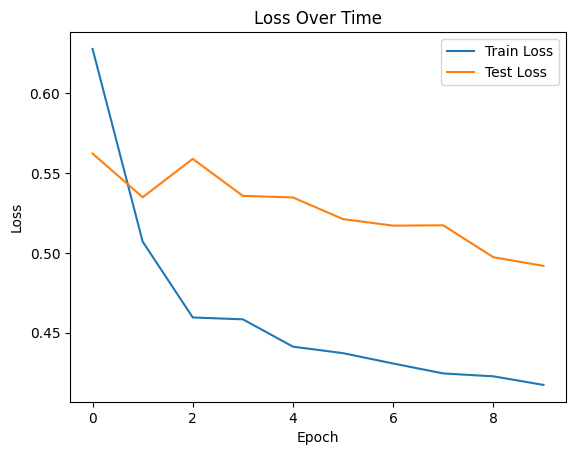

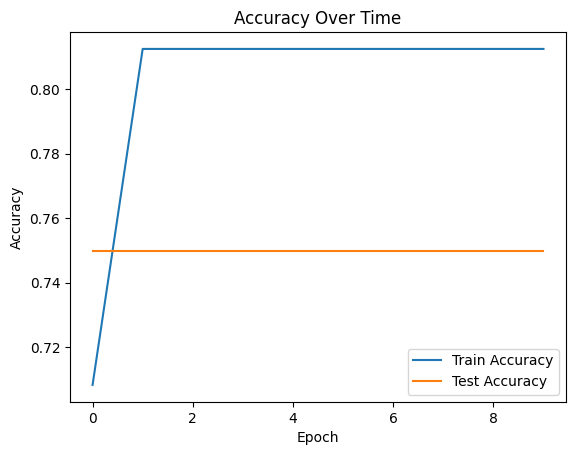

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import LSTM, Dense

parkinsons_data = pd.read_csv('/content/with noise_parkinsons - Copy.csv')

features = parkinsons_data.drop(columns=['name', 'status'], axis=1)
labels = parkinsons_data['status']

time_steps = []
for i in range(features.shape[0] - 15):
    time_steps.append(features.iloc[i:i + 15, :-1].values)

time_steps = np.array(time_steps)

X_train, X_test, y_train, y_test = train_test_split(time_steps, labels.iloc[:-15], test_size=0.2)

# Convert NumPy arrays to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

# Build LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_tf, y_train_tf, epochs=10, batch_size=32, validation_data=(X_test_tf, y_test_tf))

# Evaluate the model
score = model.evaluate(X_test_tf, y_test_tf, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Get predictions
y_pred_prob = model.predict(X_test_tf)
y_pred = (y_pred_prob > 0.5).astype(int)

# Convert y_pred to 1D array
y_pred = np.squeeze(y_pred)

# Calculate and print classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


##LSTM with Hyperparameters

Epoch 1/20
5/5 [==============================] - 3s 163ms/step - loss: 0.4802 - accuracy: 0.8056 - val_loss: 0.5198 - val_accuracy: 0.7778
Epoch 2/20
5/5 [==============================] - 0s 29ms/step - loss: 0.4588 - accuracy: 0.8056 - val_loss: 0.5012 - val_accuracy: 0.7778
Epoch 3/20
5/5 [==============================] - 0s 37ms/step - loss: 0.4492 - accuracy: 0.8056 - val_loss: 0.4927 - val_accuracy: 0.7778
Epoch 4/20
5/5 [==============================] - 0s 35ms/step - loss: 0.4418 - accuracy: 0.8125 - val_loss: 0.4793 - val_accuracy: 0.7778
Epoch 5/20
5/5 [==============================] - 0s 36ms/step - loss: 0.4343 - accuracy: 0.8125 - val_loss: 0.4765 - val_accuracy: 0.7778
Epoch 6/20
5/5 [==============================] - 0s 34ms/step - loss: 0.4279 - accuracy: 0.8056 - val_loss: 0.4739 - val_accuracy: 0.7778
Epoch 7/20
5/5 [==============================] - 0s 35ms/step - loss: 0.4139 - accuracy: 0.8125 - val_loss: 0.4582 - val_accuracy: 0.7778
Epoch 8/20
5/5 [==========

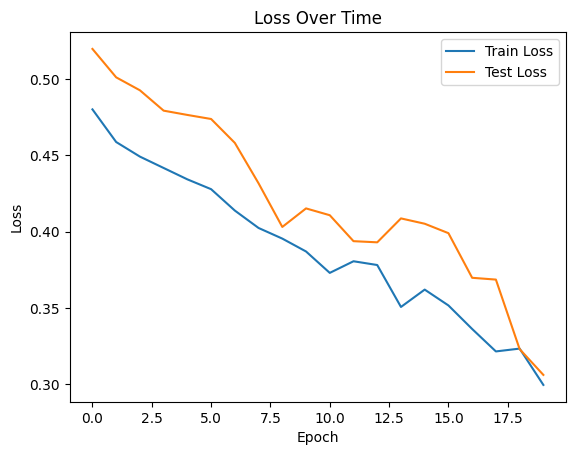

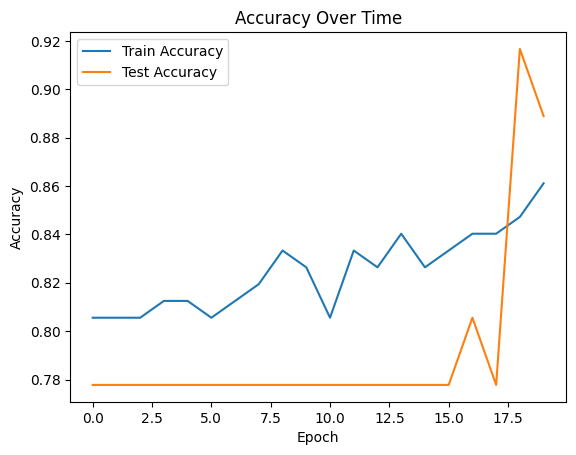

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import LSTM, Dense

parkinsons_data = pd.read_csv('/content/with noise_parkinsons - Copy.csv')

features = parkinsons_data.drop(columns=['name', 'status'], axis=1)
labels = parkinsons_data['status']

time_steps = []
for i in range(features.shape[0] - 15):
    time_steps.append(features.iloc[i:i + 15, :-1].values)

time_steps = np.array(time_steps)

X_train, X_test, y_train, y_test = train_test_split(time_steps, labels.iloc[:-15], test_size=0.2)

X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

lstm_units = 100
epochs = 20
batch_size = 32
learning_rate = 0.001

model = Sequential()
model.add(LSTM(lstm_units, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

history = model.fit(X_train_tf, y_train_tf, epochs=epochs, batch_size=batch_size, validation_data=(X_test_tf, y_test_tf))

score = model.evaluate(X_test_tf, y_test_tf, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred_prob = model.predict(X_test_tf)
y_pred = (y_pred_prob > 0.5).astype(int)

y_pred = np.squeeze(y_pred)

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


##GRU

Epoch 1/10
5/5 [==============================] - 3s 146ms/step - loss: 0.5884 - accuracy: 0.7500 - val_loss: 0.5304 - val_accuracy: 0.8056
Epoch 2/10
5/5 [==============================] - 0s 26ms/step - loss: 0.5003 - accuracy: 0.7986 - val_loss: 0.5056 - val_accuracy: 0.8056
Epoch 3/10
5/5 [==============================] - 0s 25ms/step - loss: 0.4806 - accuracy: 0.7986 - val_loss: 0.4871 - val_accuracy: 0.8056
Epoch 4/10
5/5 [==============================] - 0s 20ms/step - loss: 0.4691 - accuracy: 0.7986 - val_loss: 0.4798 - val_accuracy: 0.8056
Epoch 5/10
5/5 [==============================] - 0s 22ms/step - loss: 0.4631 - accuracy: 0.7986 - val_loss: 0.4722 - val_accuracy: 0.8056
Epoch 6/10
5/5 [==============================] - 0s 23ms/step - loss: 0.4567 - accuracy: 0.7986 - val_loss: 0.4668 - val_accuracy: 0.8056
Epoch 7/10
5/5 [==============================] - 0s 25ms/step - loss: 0.4472 - accuracy: 0.7986 - val_loss: 0.4596 - val_accuracy: 0.8056
Epoch 8/10
5/5 [==========

2/2 [==============================] - 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.81      1.00      0.89        29

    accuracy                           0.81        36
   macro avg       0.40      0.50      0.45        36
weighted avg       0.65      0.81      0.72        36



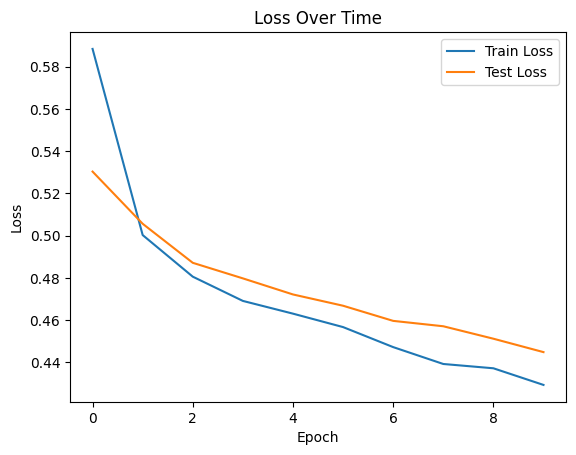

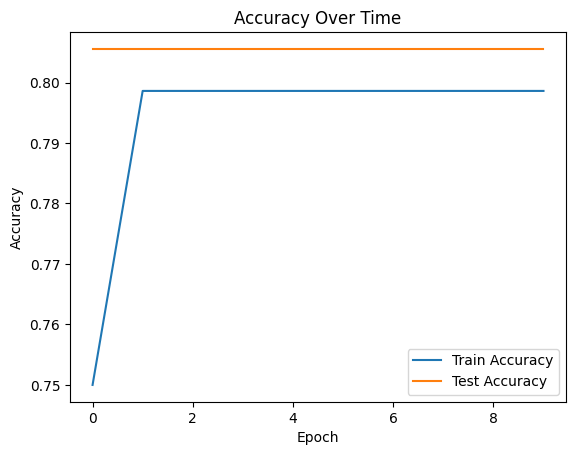

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import GRU, Dense

parkinsons_data = pd.read_csv('/content/with noise_parkinsons - Copy.csv')

features = parkinsons_data.drop(columns=['name', 'status'], axis=1)
labels = parkinsons_data['status']

time_steps = []
for i in range(features.shape[0] - 15):
    time_steps.append(features.iloc[i:i + 15, :-1].values)

time_steps = np.array(time_steps)

X_train, X_test, y_train, y_test = train_test_split(time_steps, labels.iloc[:-15], test_size=0.2)

# Convert NumPy arrays to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

# Build GRU model
model = Sequential()
model.add(GRU(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_tf, y_train_tf, epochs=10, batch_size=32, validation_data=(X_test_tf, y_test_tf))

# Evaluate the model
score = model.evaluate(X_test_tf, y_test_tf, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Get predictions
y_pred_prob = model.predict(X_test_tf)
y_pred = (y_pred_prob > 0.5).astype(int)

# Convert y_pred to 1D array
y_pred = np.squeeze(y_pred)

# Calculate and print classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


##GRU WITH Hyperparameter

Epoch 1/20
5/5 [==============================] - 5s 405ms/step - loss: 1.2612 - accuracy: 0.2014 - val_loss: 0.8437 - val_accuracy: 0.3611
Epoch 2/20
5/5 [==============================] - 0s 33ms/step - loss: 0.6464 - accuracy: 0.6389 - val_loss: 0.4837 - val_accuracy: 0.8333
Epoch 3/20
5/5 [==============================] - 0s 36ms/step - loss: 0.5012 - accuracy: 0.7917 - val_loss: 0.4213 - val_accuracy: 0.8333
Epoch 4/20
5/5 [==============================] - 0s 33ms/step - loss: 0.4877 - accuracy: 0.7917 - val_loss: 0.4086 - val_accuracy: 0.8333
Epoch 5/20
5/5 [==============================] - 0s 36ms/step - loss: 0.4767 - accuracy: 0.7917 - val_loss: 0.3994 - val_accuracy: 0.8333
Epoch 6/20
5/5 [==============================] - 0s 35ms/step - loss: 0.4541 - accuracy: 0.7917 - val_loss: 0.4073 - val_accuracy: 0.8333
Epoch 7/20
5/5 [==============================] - 0s 36ms/step - loss: 0.4385 - accuracy: 0.7917 - val_loss: 0.4169 - val_accuracy: 0.8333
Epoch 8/20
5/5 [==========

2/2 [==============================] - 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.83      1.00      0.91        30

    accuracy                           0.83        36
   macro avg       0.42      0.50      0.45        36
weighted avg       0.69      0.83      0.76        36



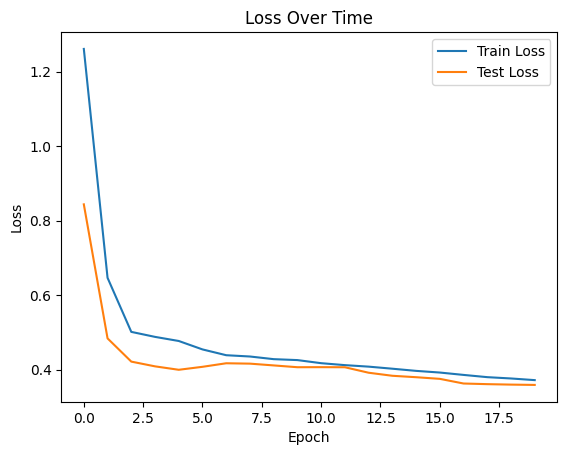

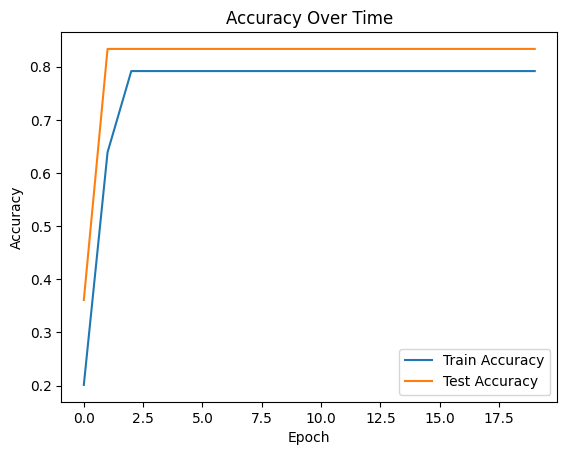

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import GRU, Dense

features = parkinsons_data.drop(columns=['name', 'status'], axis=1)
labels = parkinsons_data['status']

time_steps = []
for i in range(features.shape[0] - 15):
    time_steps.append(features.iloc[i:i + 15, :-1].values)

time_steps = np.array(time_steps)

X_train, X_test, y_train, y_test = train_test_split(time_steps, labels.iloc[:-15], test_size=0.2)

X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

gru_units = 100
epochs = 20
batch_size = 32
learning_rate = 0.001

model = Sequential()
model.add(GRU(gru_units, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

history = model.fit(X_train_tf, y_train_tf, epochs=epochs, batch_size=batch_size, validation_data=(X_test_tf, y_test_tf))

score = model.evaluate(X_test_tf, y_test_tf, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

y_pred_prob = model.predict(X_test_tf)
y_pred = (y_pred_prob > 0.5).astype(int)

y_pred = np.squeeze(y_pred)

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


##XGBOOST

Accuracy: 0.9487179487179487
Confusion Matrix:
 [[ 5  2]
 [ 0 32]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



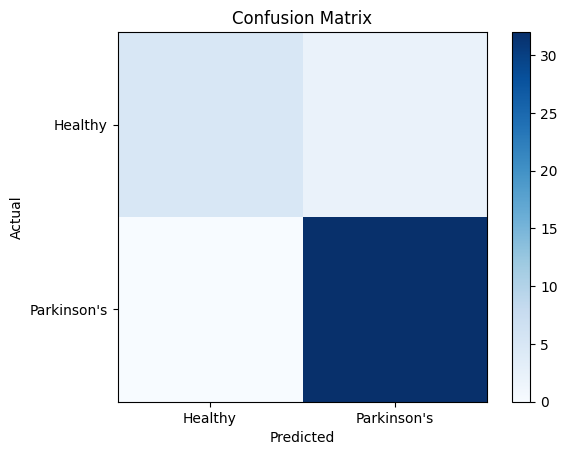

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

parkinsons_data = pd.read_csv('/content/with noise_parkinsons - Copy.csv')

features = parkinsons_data.drop(columns=['name', 'status'], axis=1)
labels = parkinsons_data['status']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Build XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Healthy', 'Parkinson\'s'])
plt.yticks([0, 1], ['Healthy', 'Parkinson\'s'])
plt.show()


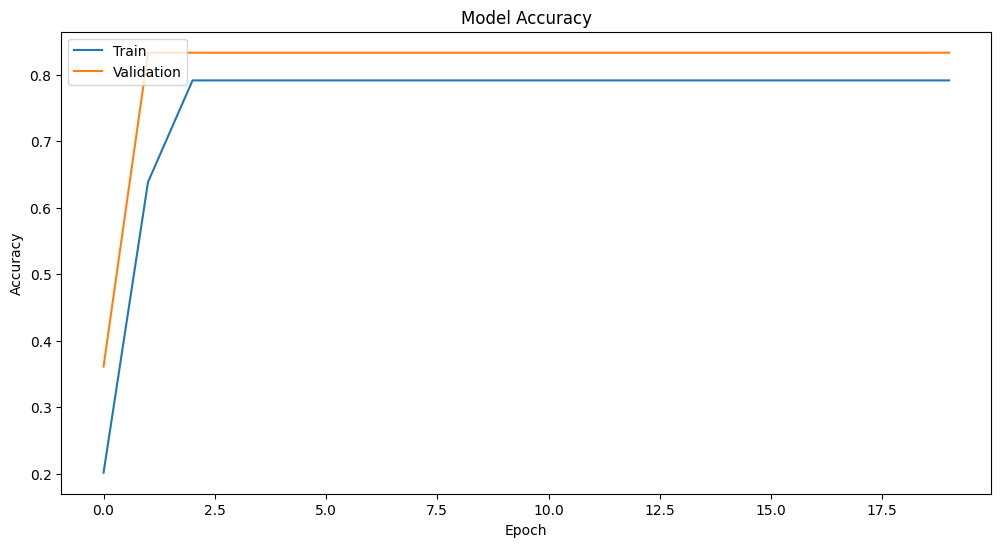

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##Data-PreProcessing

In [ ]:
#Spliting the data into target and all other variable.
X = df_main.drop(columns=['name', 'status'], axis=1)
Y = df_main['status']

X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

##Spliting the Data into training data and test data for Parkinson's

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


##SMOTE: Synthetic Minority Oversampling Technique

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter_Y = Counter(Y_train)
print('Before', counter_Y)

smt = SMOTE()
X_train_smt, Y_train_smt = smt.fit_resample(X_train, Y_train)

counter_Y = Counter(Y_train_smt)
print("After", counter_Y)

Before Counter({1: 116, 0: 40})
After Counter({1: 116, 0: 116})


##Data Standardisation for Parkinson's

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


#Model Training for Parkinson's

##Support Vector Machine

In [ ]:
model = svm.SVC(kernel='linear')

In [ ]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

##Model Evaluation for Parkinson's

In [ ]:
#accuracy score
X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_pred)

In [ ]:
print("Accuracy score of Training Data : ", training_data_accuracy)

Accuracy score of Training Data :  0.8846153846153846


In [ ]:
#accuracy score
X_test_pred = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_pred)

In [ ]:
print("Accuracy score of Testing Data : ", testing_data_accuracy)

Accuracy score of Testing Data :  0.8717948717948718


Accuracy: 0.7948717948717948


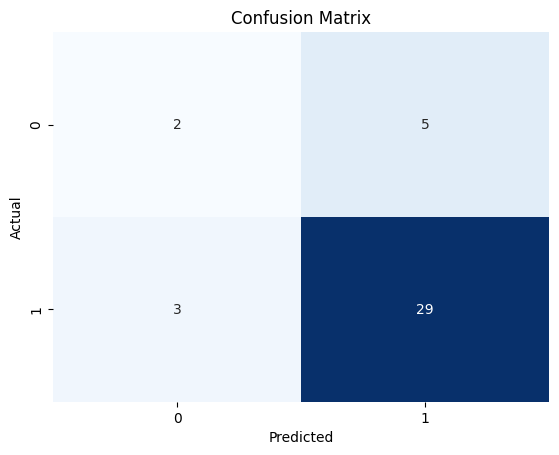

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


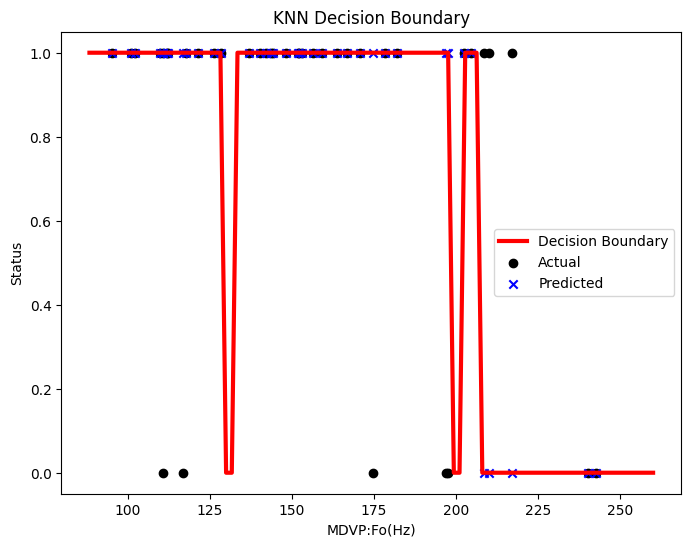

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Parkinson's disease dataset
data = pd.read_csv('/content/parkinsons.csv')

# Select features and target variable
X = data[['MDVP:Fo(Hz)']]
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors

# Fit the classifier to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot decision boundary (for 1D features)
plt.figure(figsize=(8, 6))

# Create a mesh grid
xx = np.linspace(X.values.min(), X.values.max(), 100).reshape(-1, 1)
yy = knn_model.predict(xx)

plt.plot(xx, yy, color='red', linewidth=3, label='Decision Boundary')
plt.scatter(X_test, y_test, color='black', marker='o', label='Actual')
plt.scatter(X_test, y_pred, color='blue', marker='x', label='Predicted')
plt.title('KNN Decision Boundary')
plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('Status')
plt.legend()
plt.show()
